<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/Gaussian_Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Datasets

In [38]:
df_penguin = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/penguins.csv') # Penguins dataset
df_iris = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/Iris.csv') # Iris dataset

df_penguin = numeric_df = df_penguin.dropna()


In [39]:
gm = GaussianMixture(n_components=3)
gm.fit(df_iris[['SepalLengthCm', 'PetalWidthCm']])

gm_1 = GaussianMixture(n_components=3)
gm_1.fit(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

GaussianMixture(n_components=3)

In [42]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    X_np = X.values
    plt.plot(X_np[:, 0], X_np[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Iris Dataset

In [48]:
print('Weights:\n',gm.weights_)
print('Means:\n', gm.means_)
print('Covariances:\n', gm.covariances_)
print('Converged:\n', gm.converged_)
print('Iterations:\n', gm.n_iter_)

Weights:
 [0.32709684 0.30858553 0.36431763]
Means:
 [[5.00605757 0.23727675]
 [6.57289666 2.05192938]
 [5.977111   1.33910201]]
Covariances:
 [[[0.12407758 0.01055895]
  [0.01055895 0.00905628]]

 [[0.4171415  0.05278455]
  [0.05278455 0.06790735]]

 [[0.30671183 0.08640131]
  [0.08640131 0.05609398]]]
Converged:
 True
Iterations:
 13


In [24]:
gm.predict_proba(df_iris[['SepalLengthCm', 'PetalWidthCm']]).round(3)

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.014, 0.986],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.

In [25]:
X_new, y_new = gm.sample(6)
X_new

array([[7.3005276 , 1.94778819],
       [7.34394615, 2.15693297],
       [6.92843544, 1.75101671],
       [5.8976387 , 1.53636107],
       [5.97301617, 1.42317319],
       [5.25481055, 1.45101511]])

In [26]:
y_new

array([0, 0, 0, 1, 1, 1])

In [27]:
gm.score_samples(df_iris[['SepalLengthCm', 'PetalWidthCm']]).round(2)

array([ 0.33,  0.39,  0.1 , -0.18,  0.41, -1.15, -0.75,  0.41, -1.  ,
       -0.56, -0.44,  0.29, -0.56, -1.89, -2.72, -2.1 , -1.15,  0.27,
       -1.45,  0.27, -0.44, -0.99, -0.18, -3.46,  0.29,  0.41, -1.12,
        0.16,  0.16,  0.1 ,  0.29, -1.15, -1.1 , -0.88, -0.56,  0.41,
       -0.88, -0.56, -1.  ,  0.33,  0.25, -1.22, -1.  , -5.57, -0.99,
       -0.07,  0.33, -0.18, -0.1 ,  0.41, -2.98, -0.81, -1.98, -1.03,
       -0.94, -0.65, -1.01, -2.43, -1.89, -2.74, -2.13, -1.03, -2.46,
       -0.55, -0.81, -1.68, -1.81, -1.91, -0.73, -1.  , -1.78, -0.61,
       -0.74, -1.01, -1.2 , -1.35, -2.06, -1.33, -0.87, -1.73, -1.03,
       -1.55, -0.67, -1.33, -2.56, -1.33, -1.35, -0.95, -0.81, -1.03,
       -0.86, -0.55, -0.67, -2.13, -0.81, -0.67, -0.65, -0.75, -1.76,
       -0.65, -3.14, -1.87, -1.51, -1.35, -1.42, -2.49, -4.59, -2.34,
       -1.34, -2.75, -1.16, -1.23, -1.25, -2.13, -3.53, -1.84, -1.29,
       -2.74, -2.84, -0.87, -1.69, -2.37, -2.94, -1.35, -1.21, -2.08,
       -1.42, -1.51,

In [28]:
densities = gm.score_samples(df_iris[['SepalLengthCm', 'PetalWidthCm']])
density_threshold = np.percentile(densities, 2)
anomalies = df_iris[densities < density_threshold]

<ipython-input-42-cebf7b4143f0>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-42-cebf7b4143f0>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
<ipython-input-42-cebf7b4143f0>:19: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-42-cebf7b4143f0>:22: UserWarning: Log sc

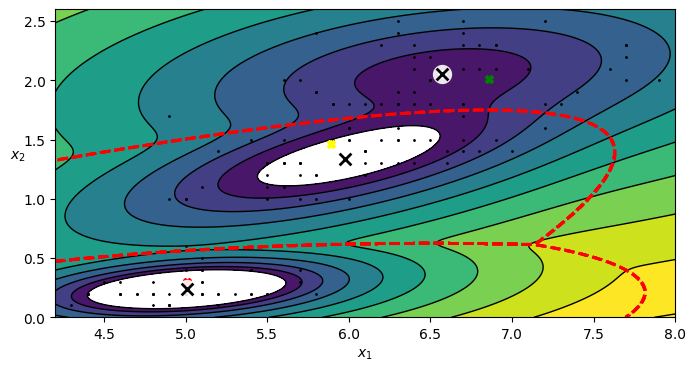

In [66]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, df_iris[['SepalLengthCm', 'PetalWidthCm']])
# Calulated center from kmeans model
k_means_centroids = [5.005556, 0.301852], [6.857143, 2.011905], [5.892593, 1.462963]
colors = ['red', 'green', 'yellow']
for i in range(len(k_means_centroids)):
    plt.plot(k_means_centroids[i][0], k_means_centroids[i][1], 'X', color=colors[i])
plt.plot()
plt.show()

In [32]:
gm.bic(df_iris[['SepalLengthCm', 'PetalWidthCm']])

468.52838560971435

In [33]:
gm.aic(df_iris[['SepalLengthCm', 'PetalWidthCm']])

417.347585610078

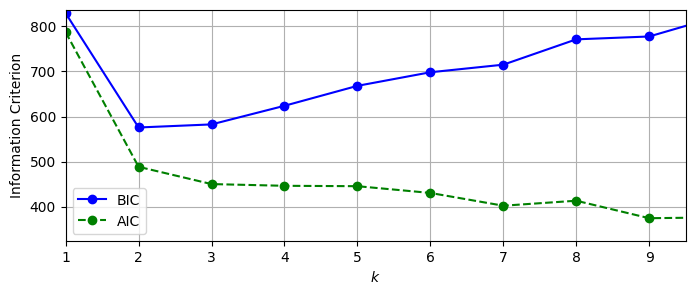

In [35]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
             for k in range(1, 11)]
bics = [model.bic(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) for model in gms_per_k]
aics = [model.aic(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

Iris Accuracy

In [23]:
gm.predict(df_iris[['SepalLengthCm', 'PetalWidthCm']])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Penguins Dataset

In [47]:
print('Weights:\n',gm_1.weights_)
print('Means:\n', gm_1.means_)
print('Covariances:\n', gm_1.covariances_)
print('Converged:\n', gm_1.converged_)
print('Iterations:\n', gm_1.n_iter_)

Weights:
 [0.21834651 0.42437221 0.35728128]
Means:
 [[ 17.62520266 186.24015262]
 [ 18.75360426 194.84634821]
 [ 14.99646132 217.236974  ]]
Covariances:
 [[[ 0.74757078 -0.63450646]
  [-0.63450646 27.22194063]]

 [[ 1.32252667  1.92158519]
  [ 1.92158519 39.39134863]]

 [[ 0.96399902  4.57746188]
  [ 4.57746188 42.99609874]]]
Converged:
 True
Iterations:
 7


In [50]:
gm_1.predict_proba(df_penguin[['bill_depth_mm', 'flipper_length_mm']]).round(3)

array([[0.777, 0.223, 0.   ],
       [0.747, 0.253, 0.   ],
       [0.165, 0.835, 0.   ],
       [0.041, 0.959, 0.   ],
       [0.008, 0.992, 0.   ],
       [0.85 , 0.15 , 0.   ],
       [0.01 , 0.99 , 0.   ],
       [0.838, 0.162, 0.   ],
       [0.001, 0.999, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.742, 0.258, 0.   ],
       [0.035, 0.965, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.698, 0.302, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.929, 0.071, 0.   ],
       [0.811, 0.189, 0.   ],
       [0.176, 0.824, 0.   ],
       [0.702, 0.298, 0.   ],
       [0.872, 0.128, 0.   ],
       [0.383, 0.617, 0.   ],
       [0.709, 0.291, 0.   ],
       [0.641, 0.359, 0.   ],
       [0.941, 0.059, 0.   ],
       [0.786, 0.214, 0.   ],
       [0.87 , 0.13 , 0.   ],
       [0.89 , 0.11 , 0.   ],
       [0.609, 0.391, 0.   ],
       [0.586, 0.414, 0.   ],
       [0.38 , 0.62 , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.032, 0.968, 0.   ],
       [0.83 , 0.17 , 0.   ],
       [0.

In [51]:
X_new_1, y_new_1 = gm_1.sample(6)
X_new_1

array([[ 18.67450398, 181.62893533],
       [ 18.22044915, 186.91646732],
       [ 19.18752074, 200.33173047],
       [ 17.59378372, 180.57191088],
       [ 18.00734453, 197.6692069 ],
       [ 17.27420142, 231.5163256 ]])

In [52]:
y_new_1

array([0, 0, 1, 1, 1, 2])

In [54]:
gm_1.score_samples(df_penguin[['bill_depth_mm', 'flipper_length_mm']]).round(2)

array([-5.73, -4.6 , -4.69, -4.8 , -6.69, -5.2 , -4.91, -5.02, -7.64,
       -6.72, -4.6 , -4.62, -6.07, -4.94, -7.81, -7.64, -5.95, -5.09,
       -4.67, -5.66, -5.05, -5.26, -4.48, -8.8 , -6.2 , -6.82, -6.04,
       -4.45, -5.43, -5.42, -6.79, -5.8 , -5.75, -6.59, -5.69, -5.04,
       -4.59, -4.8 , -4.97, -5.04, -4.71, -5.91, -4.45, -7.64, -4.53,
       -4.94, -4.45, -5.07, -4.52, -4.57, -4.56, -4.58, -6.09, -4.66,
       -5.04, -6.86, -4.95, -4.49, -4.97, -4.5 , -6.6 , -5.12, -5.32,
       -4.86, -4.83, -4.53, -5.37, -4.67, -4.54, -4.58, -5.14, -6.13,
       -6.13, -4.65, -4.66, -5.02, -4.96, -4.86, -4.49, -5.67, -5.24,
       -4.66, -5.09, -4.71, -5.76, -6.48, -4.86, -4.58, -4.6 , -6.93,
       -4.61, -4.63, -7.91, -4.53, -4.52, -5.77, -6.79, -5.8 , -4.54,
       -5.43, -5.95, -5.8 , -5.59, -4.69, -6.74, -6.04, -4.64, -4.86,
       -6.67, -4.67, -4.81, -5.82, -4.82, -4.66, -4.67, -5.08, -7.18,
       -5.43, -6.62, -4.85, -4.55, -4.6 , -4.84, -8.46, -4.45, -4.73,
       -4.53, -4.92,

In [55]:
densities_1 = gm_1.score_samples(df_penguin[['bill_depth_mm', 'flipper_length_mm']])
density_threshold_1 = np.percentile(densities_1, 2)
anomalies_1 = df_penguin[densities_1 < density_threshold_1]

<ipython-input-42-cebf7b4143f0>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-42-cebf7b4143f0>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.war

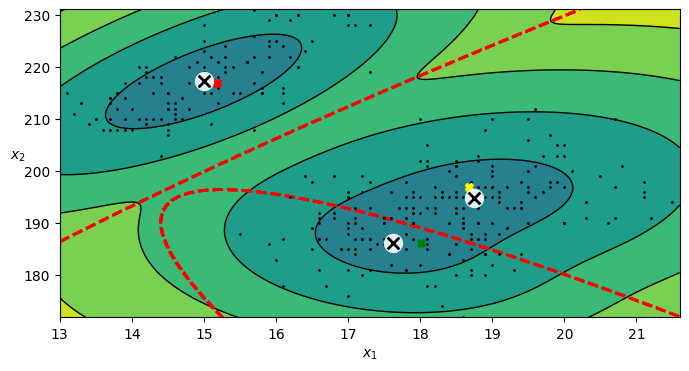

In [65]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_1, df_penguin[['bill_depth_mm', 'flipper_length_mm']])
# Calculated centers for kmeans model
k_means_centroids = [15.188281, 216.960938], [18.008036, 186.1875], [18.673529, 196.95098]
colors = ['red', 'green', 'yellow']
for i in range(len(k_means_centroids)):
    plt.plot(k_means_centroids[i][0], k_means_centroids[i][1], 'X', color=colors[i])
plt.plot()
plt.show()

In [44]:
gm_1.bic(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

3661.164823329415

In [45]:
gm_1.aic(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

3596.4264009997473

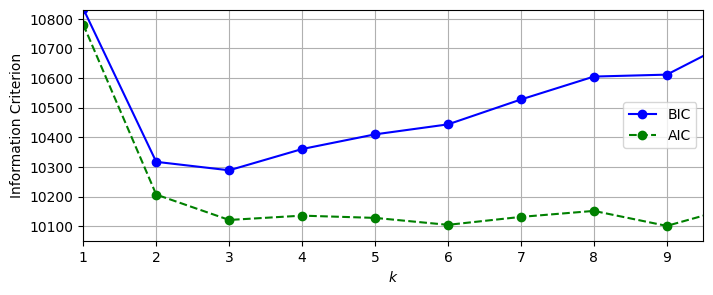

In [41]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
             for k in range(1, 11)]
bics = [model.bic(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]) for model in gms_per_k]
aics = [model.aic(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

Penguin Accuracy

In [49]:
gm_1.predict(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,